In [54]:
import matplotlib.pyplot as plt
import numpy as np
import re
import statistics

In [49]:
def pre_process_data(time_data_path):
    data = open(time_data_path, 'r').readlines()
    times = {}
    benchmark = ""
    regex = re.compile('(\d{1,})m(\d{1,2}.\d{3})s')
    user, sys = 3, 5
    for line in data:
        values = line.split()
        if len(values) == 1:
            benchmark = values[0]
            times[benchmark] = []
        else:
            match_user_time = regex.match(values[user])
            user_time = float(match_user_time.group(1))*60 + float(match_user_time.group(2))
            match_sys_time = regex.match(values[sys])
            sys_time = float(match_sys_time.group(1))*60 + float(match_sys_time.group(2))
            times[benchmark].append(user_time + sys_time)
    return times

In [50]:
def plot_times(benchmark, noaot, aot):
    plt.title(benchmark)
    x = range(len(noaot))
    plt.scatter(x, aot, marker='^', c='blue', label="AOT")
    plt.scatter(x, noaot, marker='o', c='orange', label="No AOT")
    plt.legend()
    plt.show()

In [51]:
noaot = pre_process_data('./output_noaot.txt')
aot = pre_process_data('./output_aot.txt')

NO AOT median 24.79
AOT median 25.61


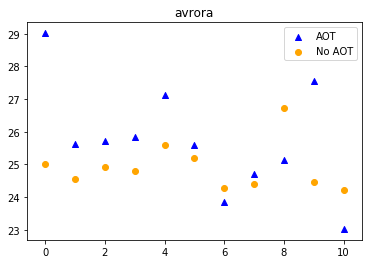

NO AOT median 13.50
AOT median 5.48


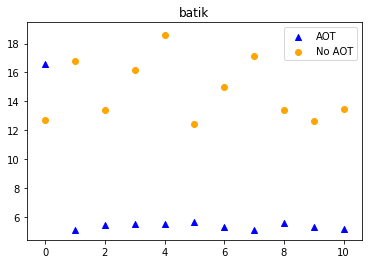

NO AOT median 187.64
AOT median 154.52


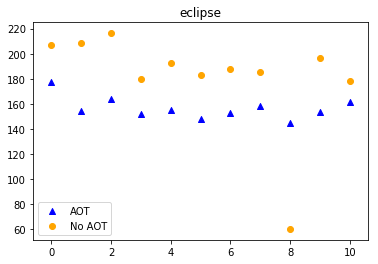

NO AOT median 16.90
AOT median 4.60


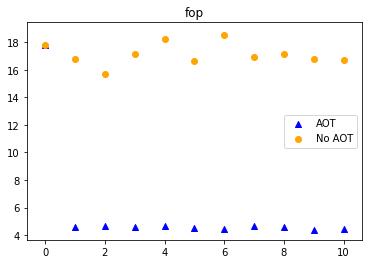

NO AOT median 130.03
AOT median 143.00


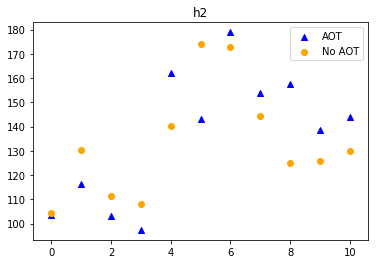

NO AOT median 140.52
AOT median 175.78


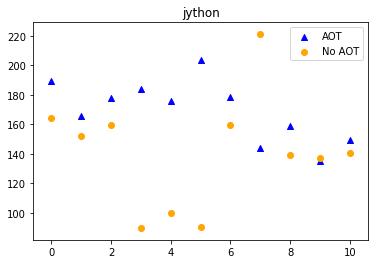

NO AOT median 16.51
AOT median 7.72


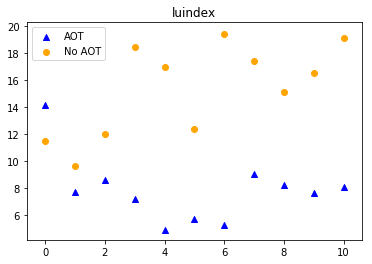

NO AOT median 12.49
AOT median 17.53


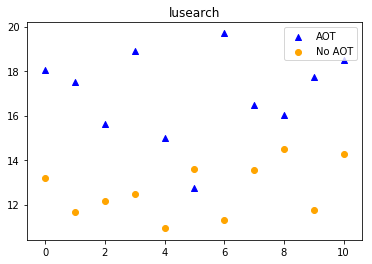

NO AOT median 12.51
AOT median 23.64


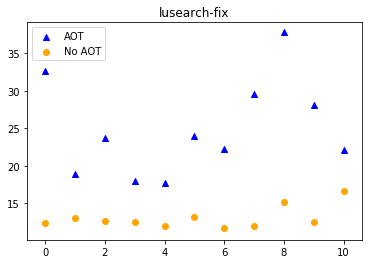

NO AOT median 14.85
AOT median 18.41


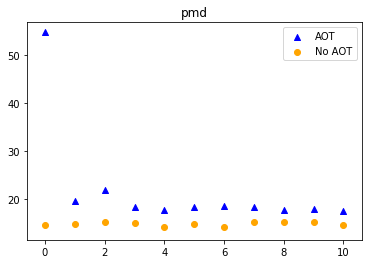

NO AOT median 24.18
AOT median 28.04


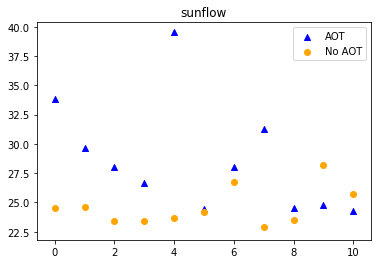

NO AOT median 53.53
AOT median 31.27


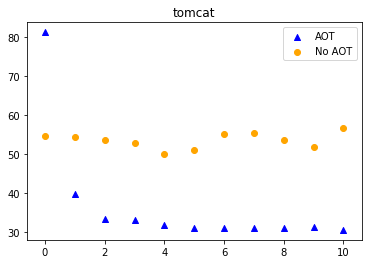

NO AOT median 7.04
AOT median 4.20


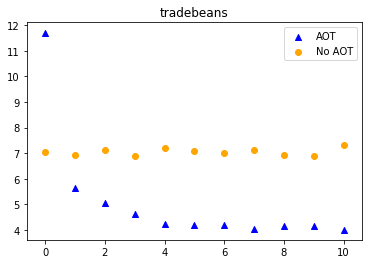

NO AOT median 7.18
AOT median 4.67


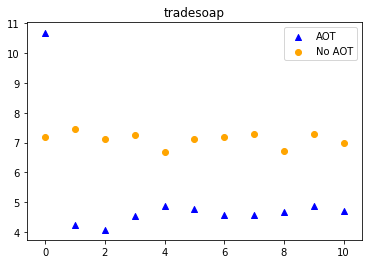

NO AOT median 25.29
AOT median 17.61


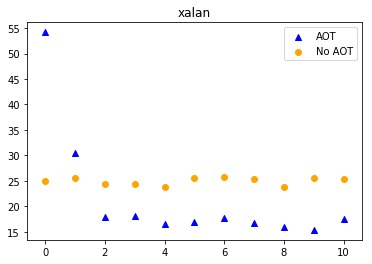

In [56]:
for b in noaot.keys():
    print("NO AOT median %.2f" % statistics.median(noaot[b]))
    print("AOT median %.2f" % statistics.median(aot[b]))
    plot_times(b, noaot[b], aot[b])